<!-- 
2. https://www.kaggle.com/competitions/playground-series-s5e3 -->

Binray Predication With Rainfall

In [40]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

In [41]:
df_test=pd.read_csv("./data/test.csv")
df_train=pd.read_csv("./data/train.csv")

In [42]:
# check the shape of the data
print(f"Shape of the Test data is  {df_test.shape}")
print("-"*35)
print(f"Shape of the Train data is {df_train.shape}")

Shape of the Test data is  (730, 12)
-----------------------------------
Shape of the Train data is (2190, 13)


In [43]:
df_train.describe()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [44]:
df_train.isnull().sum().sum()

np.int64(0)

In [45]:
df_train.duplicated().sum()

np.int64(0)

In [46]:
df_train.columns

Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed', 'rainfall'],
      dtype='object')

In [47]:
df_train["cloud"].value_counts()

cloud
88.0    375
84.0    129
83.0    127
78.0     95
81.0     88
       ... 
11.0      2
34.0      2
7.0       1
27.0      1
2.0       1
Name: count, Length: 78, dtype: int64

In [48]:
# Grouby by cloud with day
df_train.groupby("cloud")["rainfall"].max()


cloud
2.0      0
7.0      0
11.0     0
17.0     0
19.0     0
        ..
95.0     1
96.0     1
97.0     1
99.0     1
100.0    1
Name: rainfall, Length: 78, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

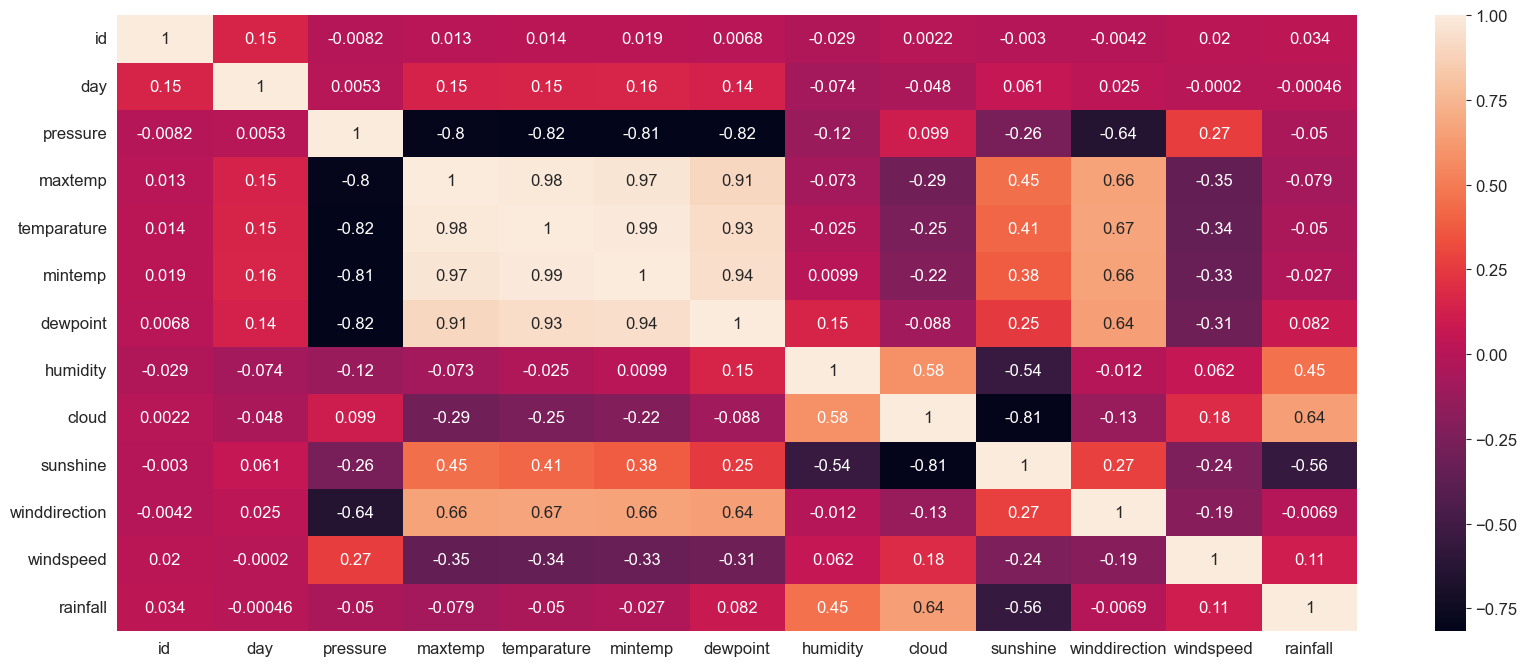

In [49]:
# Let us visualize correlation values using a heatmap
plt.figure(figsize=(20,8))
sns.heatmap(df_train.corr(),annot=True)
plt.show

In [50]:
df_train.dtypes

id                 int64
day                int64
pressure         float64
maxtemp          float64
temparature      float64
mintemp          float64
dewpoint         float64
humidity         float64
cloud            float64
sunshine         float64
winddirection    float64
windspeed        float64
rainfall           int64
dtype: object

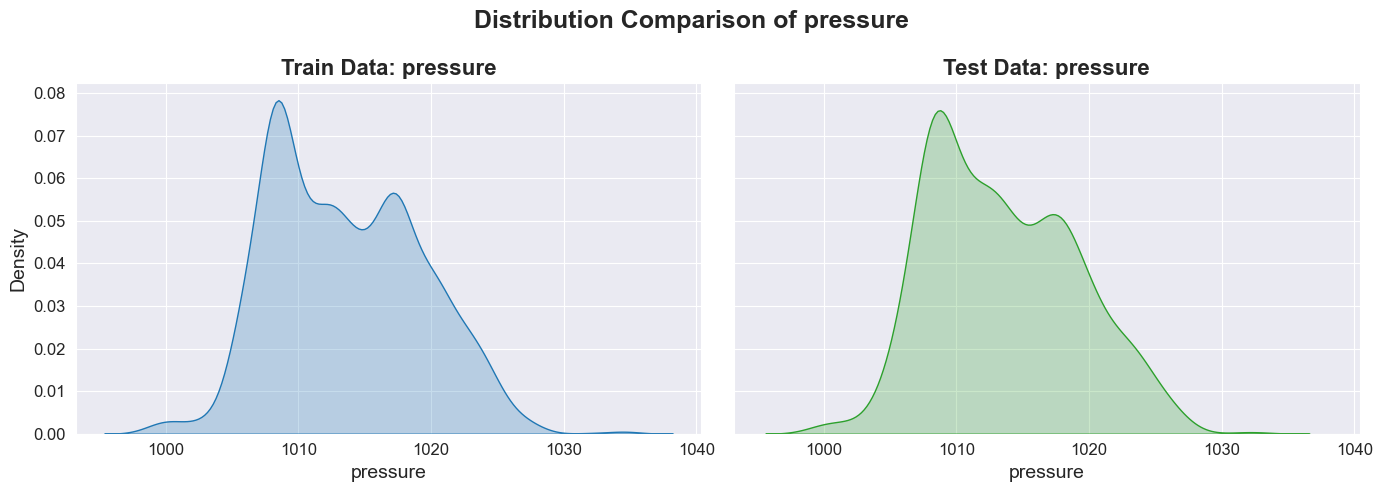

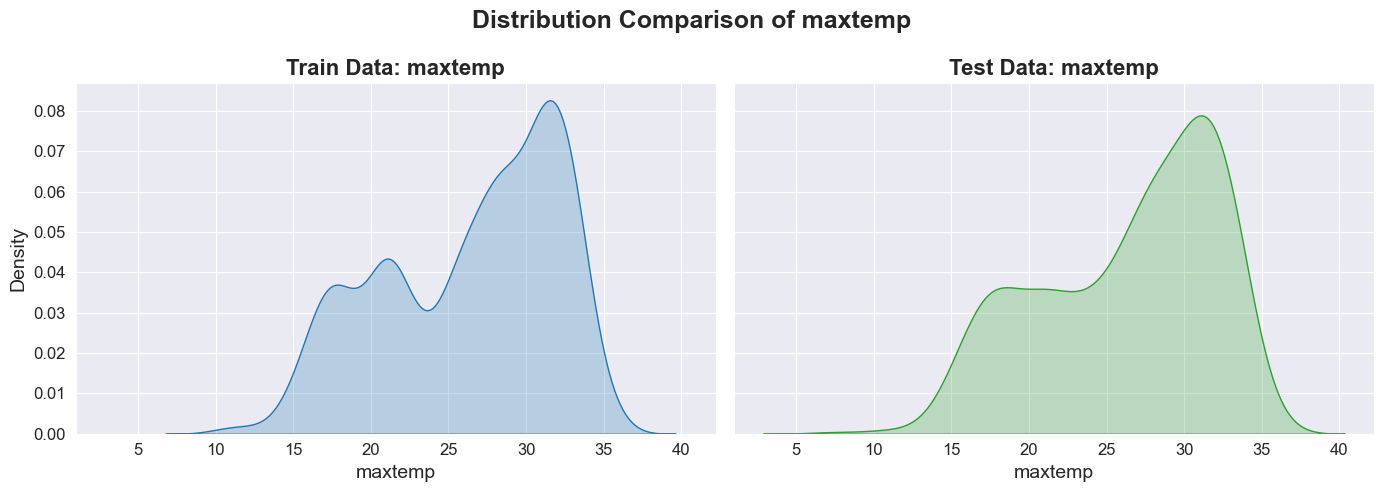

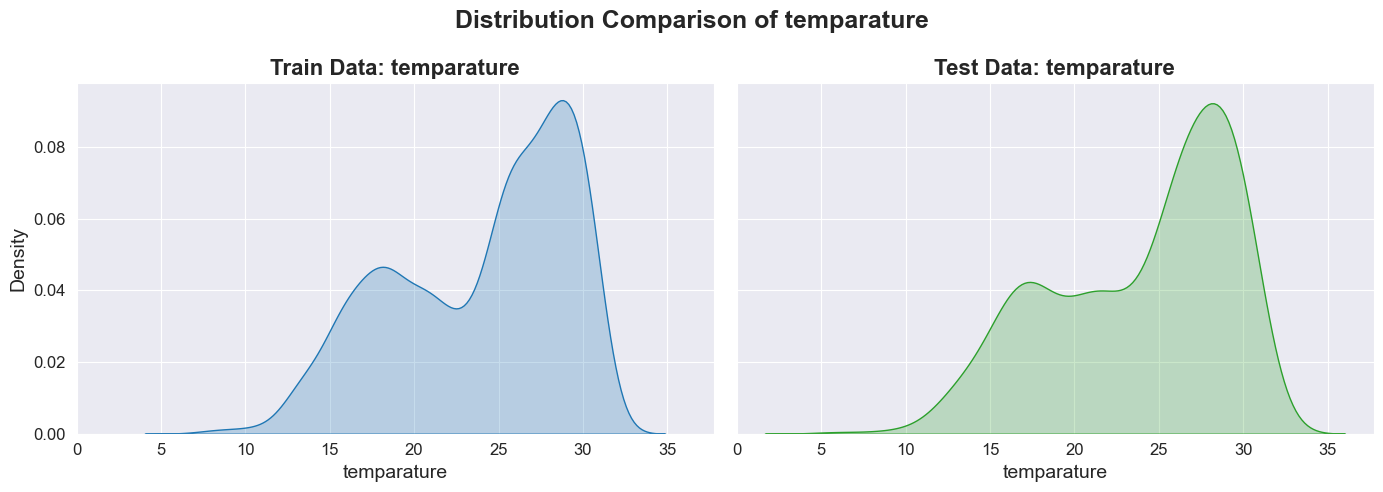

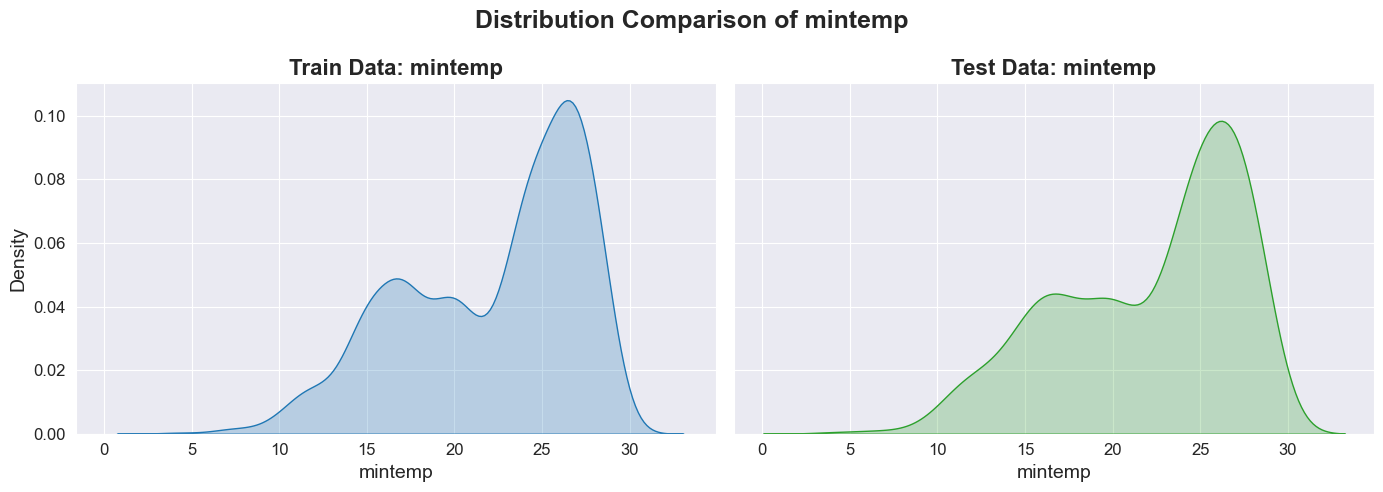

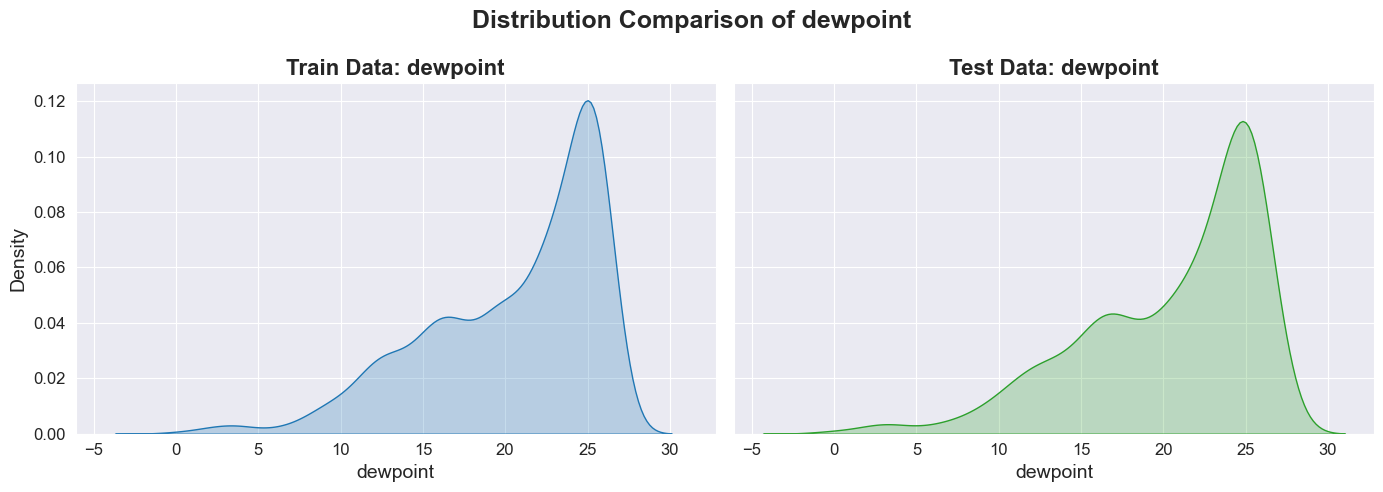

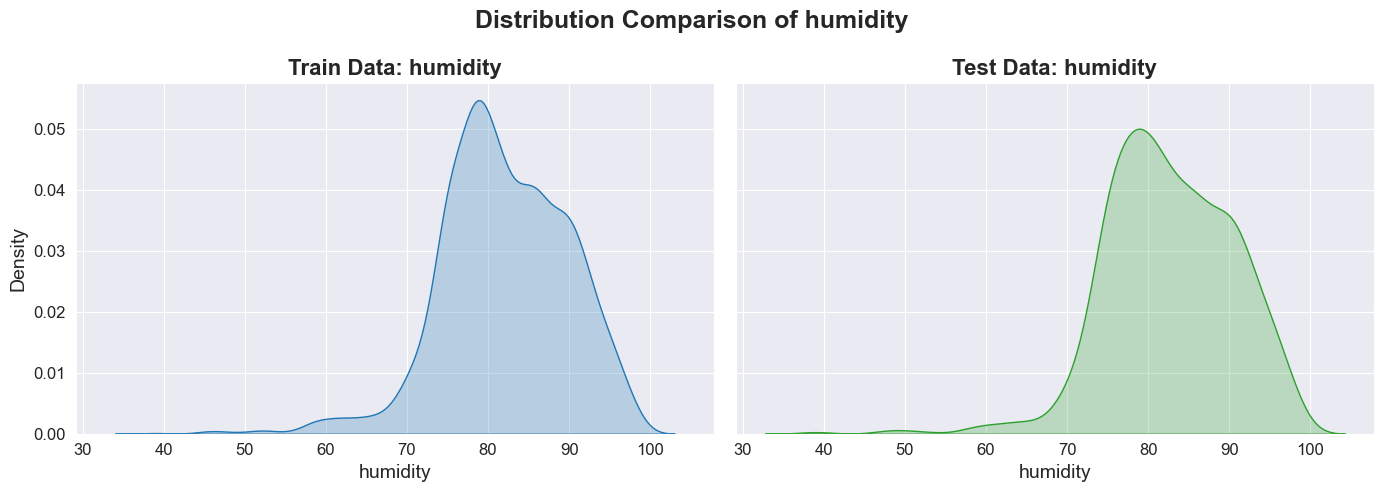

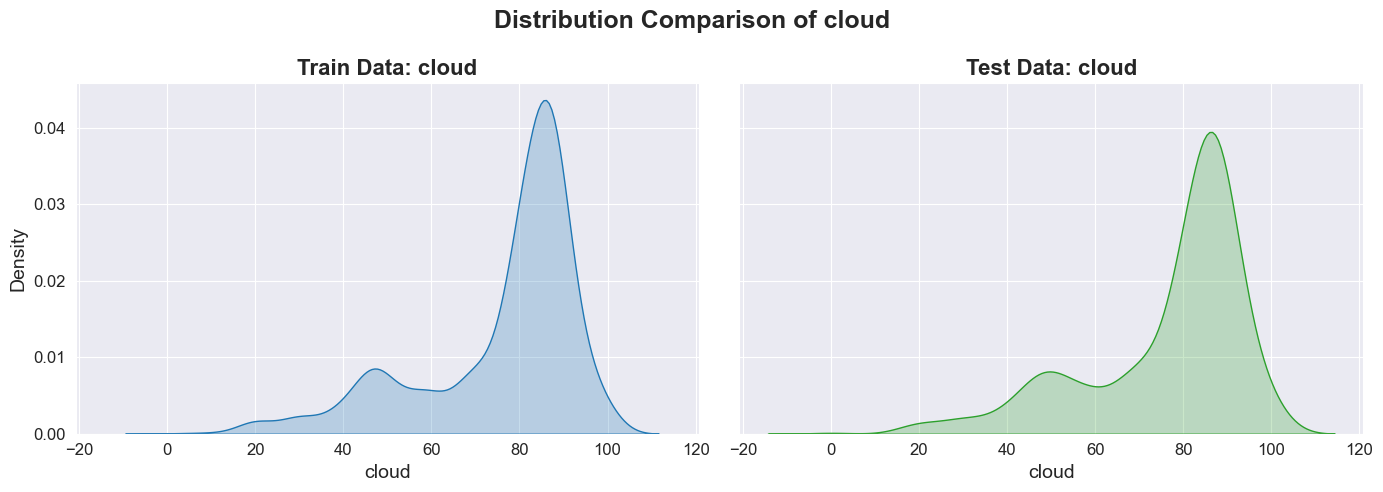

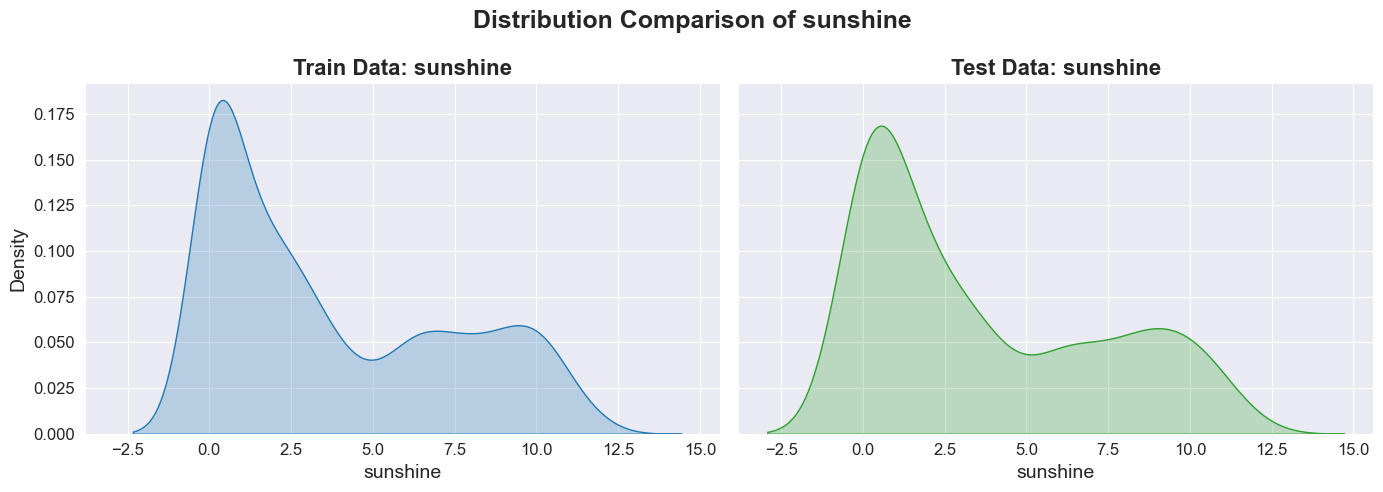

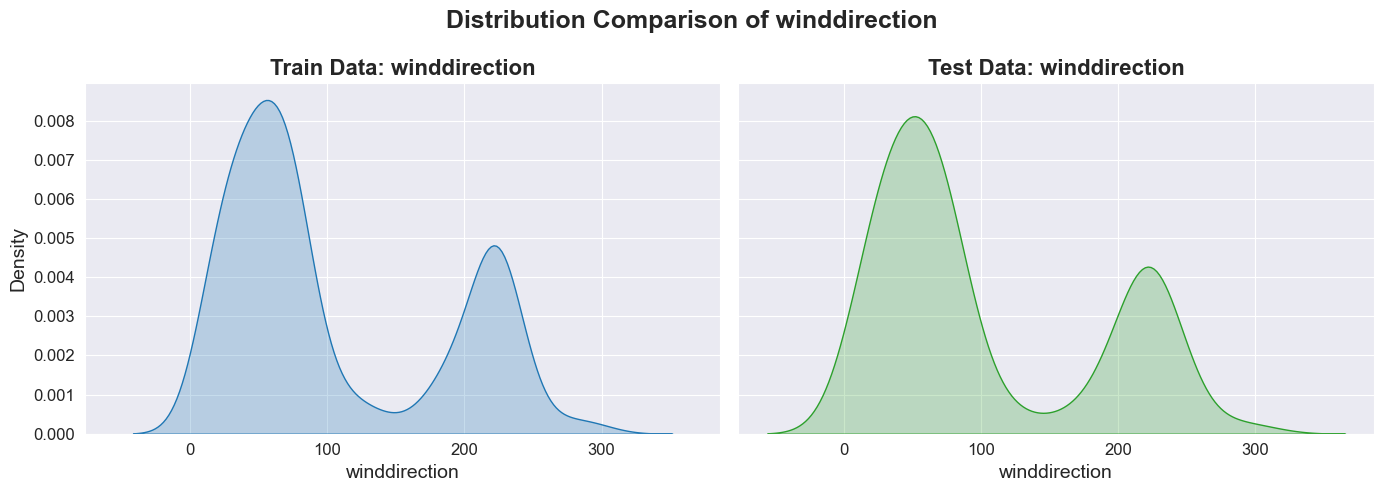

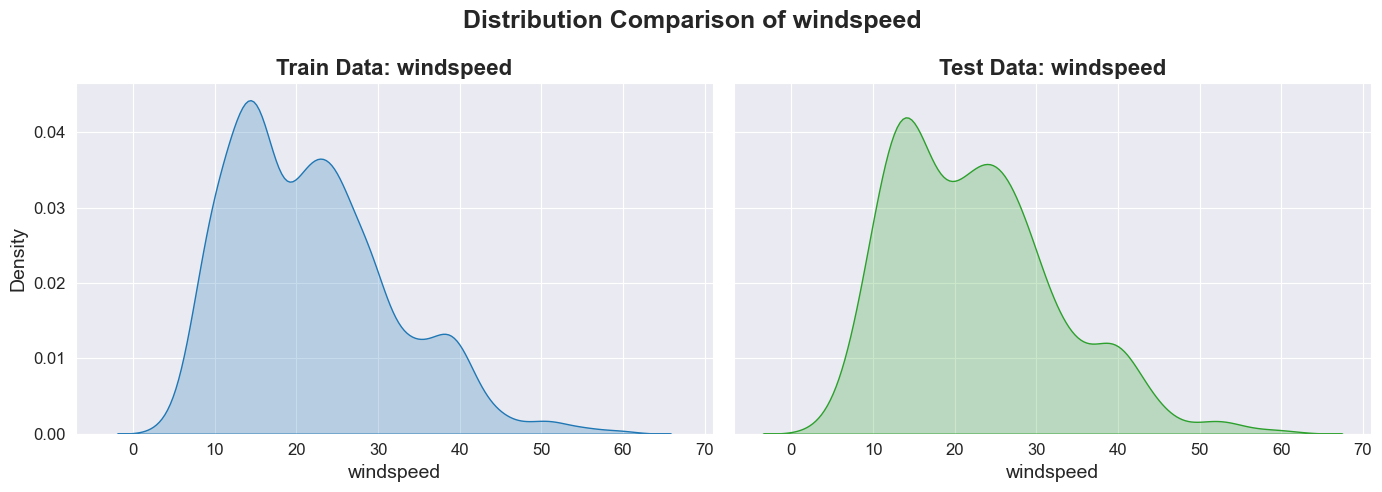

In [51]:
sns.set_style("darkgrid")  
plt.rcParams.update({'font.size': 12, 'axes.labelsize': 14, 'axes.titlesize': 16})

# Define numerical features
numerical_features = ['pressure', 'maxtemp', 'temparature', 'mintemp',
                      'dewpoint', 'humidity', 'cloud', 'sunshine', 
                      'winddirection', 'windspeed']

# Loop through each numerical feature to create KDE plots
for feature in numerical_features:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True, sharey=True)
    
    # Train Data Distribution
    sns.kdeplot(df_train[feature], fill=True, color='#1f77b4', ax=axes[0])
    axes[0].set_title(f'Train Data: {feature}', fontweight='bold')
    axes[0].set_xlabel(feature)
    
    # Test Data Distribution
    sns.kdeplot(df_test[feature], fill=True, color='#2ca02c', ax=axes[1])
    axes[1].set_title(f'Test Data: {feature}', fontweight='bold')
    axes[1].set_xlabel(feature)
    
    # Improve layout and display
    plt.suptitle(f'Distribution Comparison of {feature}', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()


C:\Users\Sajjad Khan\AppData\Local\Temp\ipykernel_4916\1008766071.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train['rainfall'], y=df_train[feature], palette=['#1f77b4', '#ff7f0e'])


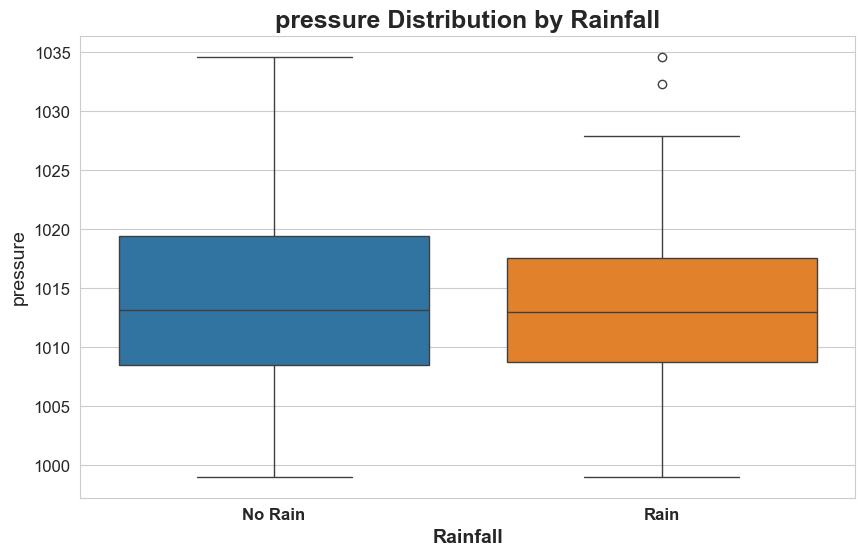

C:\Users\Sajjad Khan\AppData\Local\Temp\ipykernel_4916\1008766071.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train['rainfall'], y=df_train[feature], palette=['#1f77b4', '#ff7f0e'])


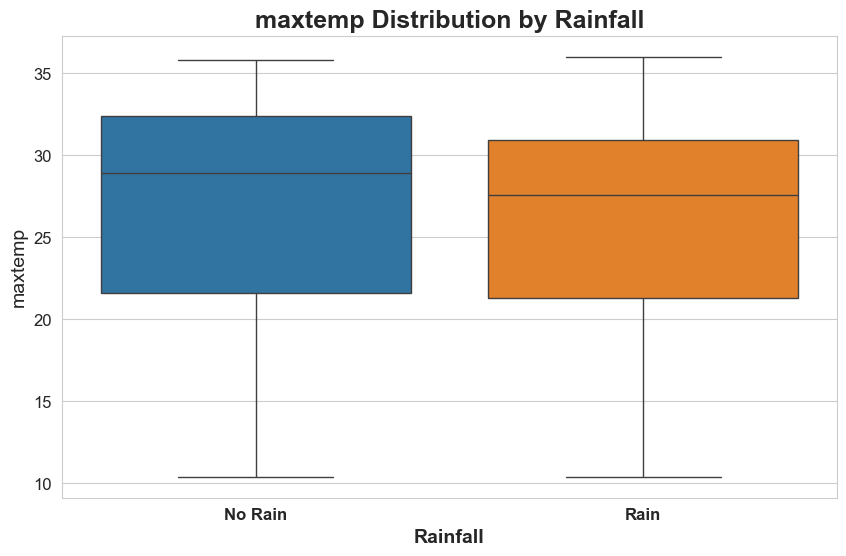

C:\Users\Sajjad Khan\AppData\Local\Temp\ipykernel_4916\1008766071.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train['rainfall'], y=df_train[feature], palette=['#1f77b4', '#ff7f0e'])


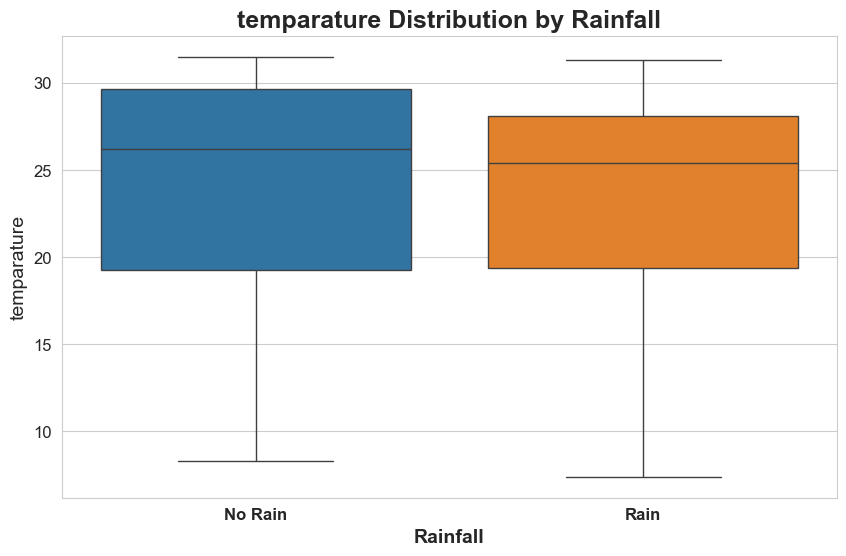

C:\Users\Sajjad Khan\AppData\Local\Temp\ipykernel_4916\1008766071.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train['rainfall'], y=df_train[feature], palette=['#1f77b4', '#ff7f0e'])


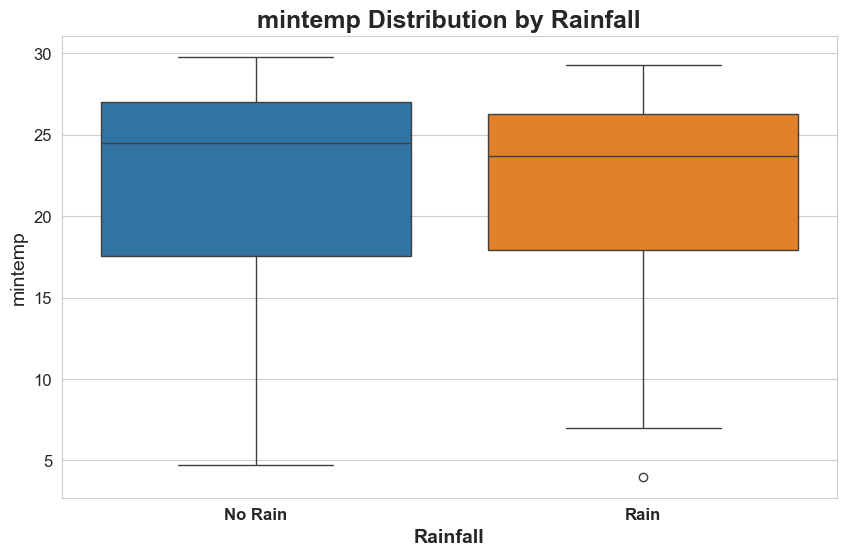

C:\Users\Sajjad Khan\AppData\Local\Temp\ipykernel_4916\1008766071.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train['rainfall'], y=df_train[feature], palette=['#1f77b4', '#ff7f0e'])


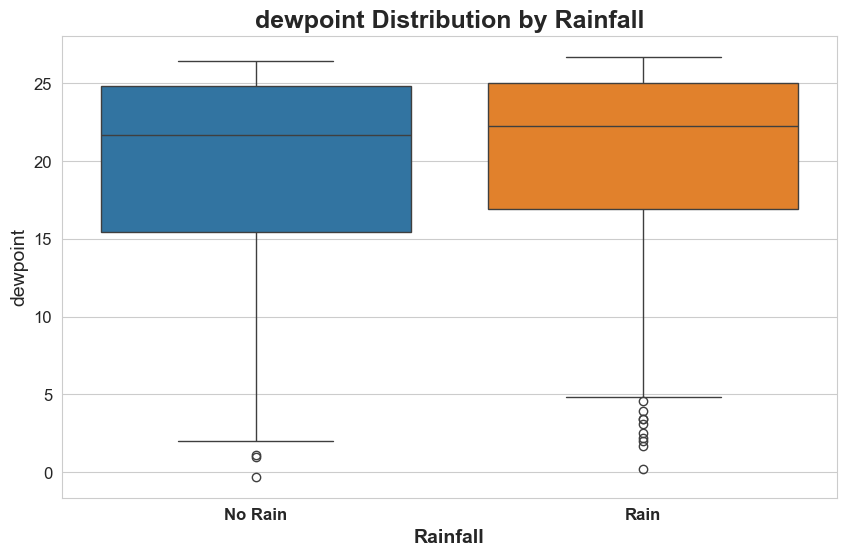

C:\Users\Sajjad Khan\AppData\Local\Temp\ipykernel_4916\1008766071.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train['rainfall'], y=df_train[feature], palette=['#1f77b4', '#ff7f0e'])


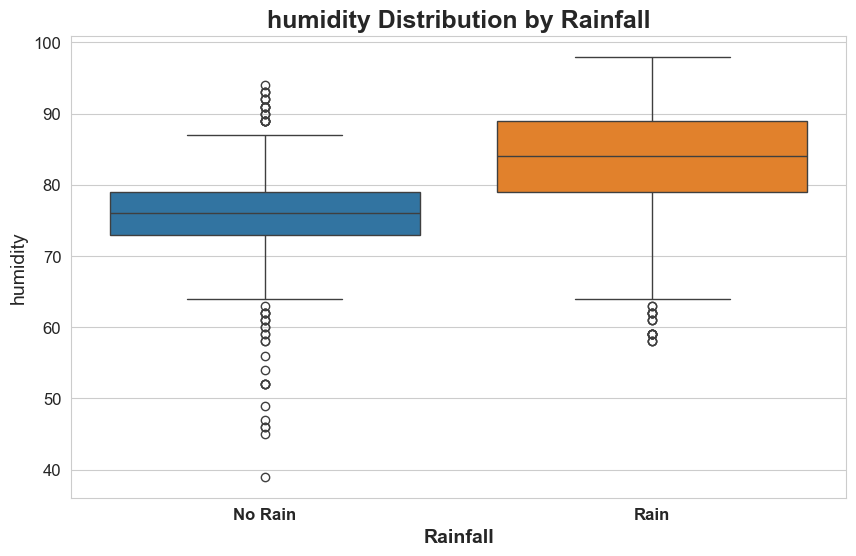

C:\Users\Sajjad Khan\AppData\Local\Temp\ipykernel_4916\1008766071.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train['rainfall'], y=df_train[feature], palette=['#1f77b4', '#ff7f0e'])


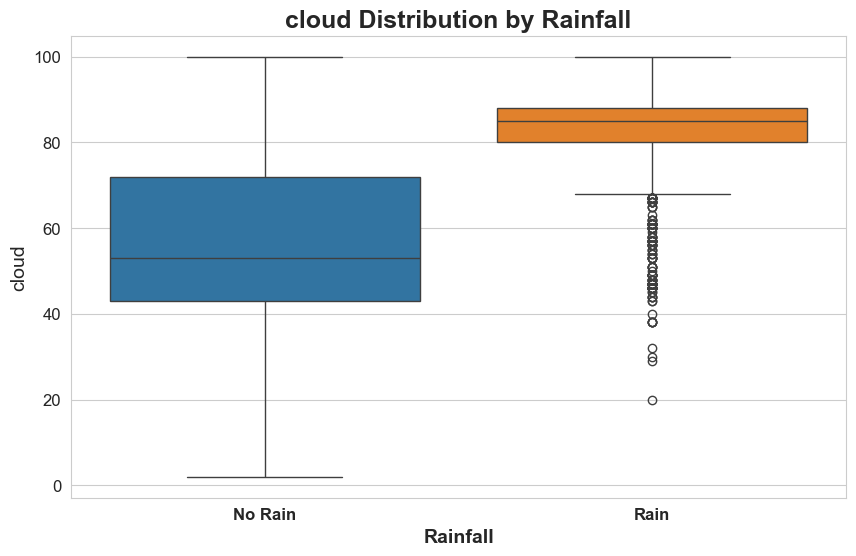

C:\Users\Sajjad Khan\AppData\Local\Temp\ipykernel_4916\1008766071.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train['rainfall'], y=df_train[feature], palette=['#1f77b4', '#ff7f0e'])


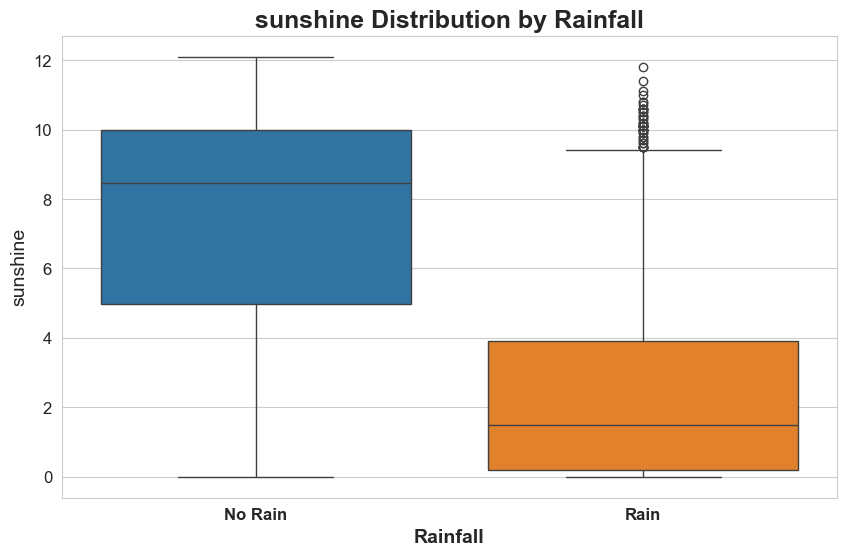

C:\Users\Sajjad Khan\AppData\Local\Temp\ipykernel_4916\1008766071.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train['rainfall'], y=df_train[feature], palette=['#1f77b4', '#ff7f0e'])


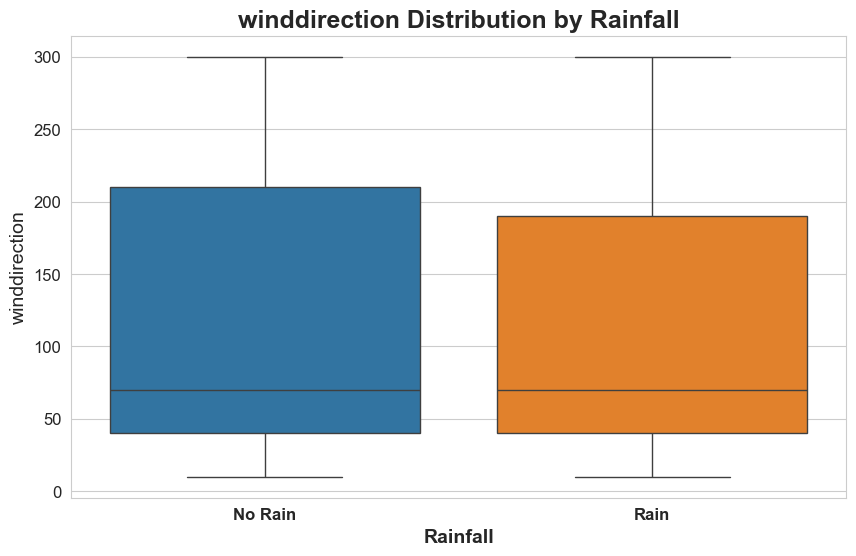

C:\Users\Sajjad Khan\AppData\Local\Temp\ipykernel_4916\1008766071.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train['rainfall'], y=df_train[feature], palette=['#1f77b4', '#ff7f0e'])


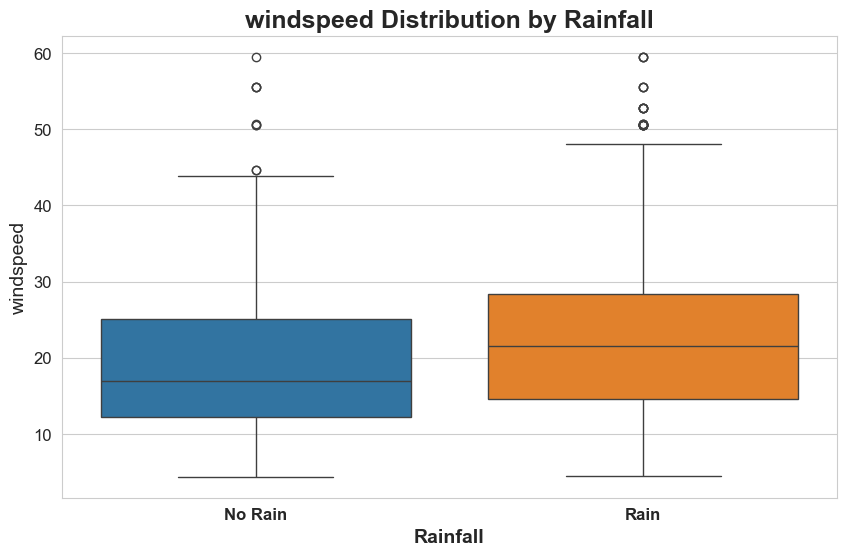

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a professional style
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12, 'axes.labelsize': 14, 'axes.titlesize': 16})

# Define numerical features
numerical_features = ['pressure', 'maxtemp', 'temparature', 'mintemp',
                      'dewpoint', 'humidity', 'cloud', 'sunshine', 
                      'winddirection', 'windspeed']

# Loop through each numerical feature to create boxplots based on Rainfall (0 = No Rain, 1 = Rain)
for feature in numerical_features:
    plt.figure(figsize=(10, 6))

    # Boxplot for the feature grouped by Rainfall
    sns.boxplot(x=df_train['rainfall'], y=df_train[feature], palette=['#1f77b4', '#ff7f0e'])

    # Set labels and title
    plt.xticks([0, 1], ['No Rain', 'Rain'], fontsize=12, fontweight='bold')
    plt.xlabel('Rainfall', fontsize=14, fontweight='bold')
    plt.ylabel(feature, fontsize=14)
    plt.title(f'{feature} Distribution by Rainfall', fontsize=18, fontweight='bold')

    # Show plot
    plt.show()


In [53]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numerical features to scale
numerical_features = ['pressure', 'maxtemp', 'temparature', 'mintemp',
                      'dewpoint', 'humidity', 'cloud', 'sunshine', 
                      'winddirection', 'windspeed']

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Choose one: Standardization or Normalization
df_train_scaled = df_train.copy()
df_test_scaled = df_test.copy()

# Apply StandardScaler
df_train_scaled[numerical_features] = standard_scaler.fit_transform(df_train[numerical_features])
df_test_scaled[numerical_features] = standard_scaler.transform(df_test[numerical_features])

# OR Apply MinMaxScaler
# df_train_scaled[numerical_features] = minmax_scaler.fit_transform(df_train[numerical_features])
# df_test_scaled[numerical_features] = minmax_scaler.transform(df_test[numerical_features])



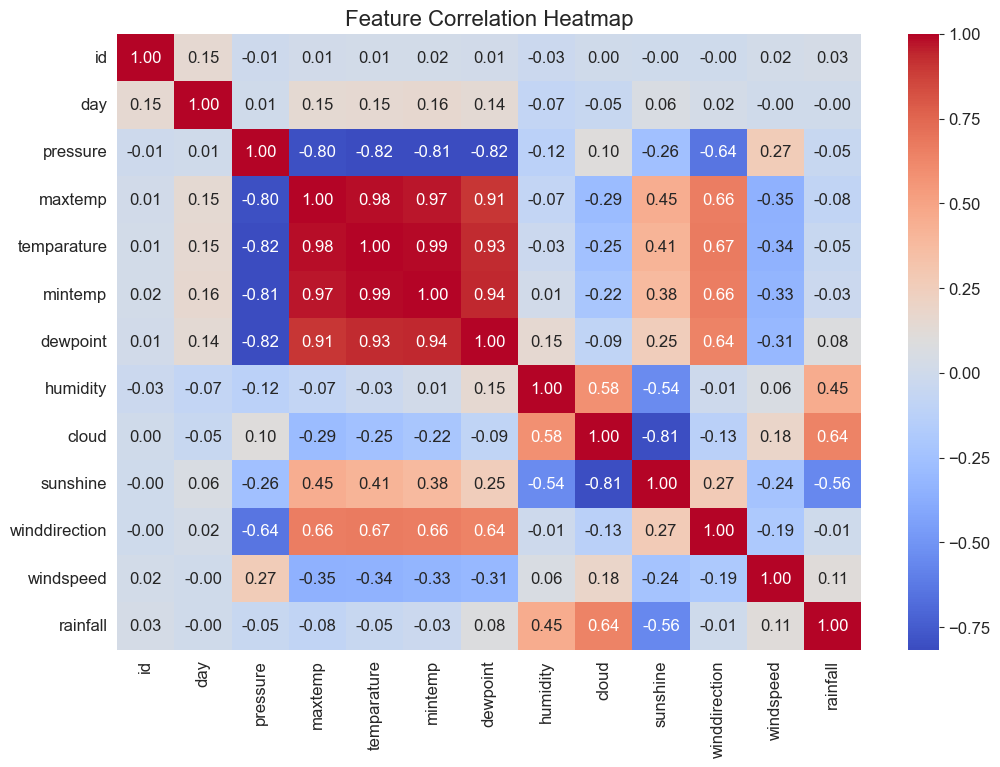

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_train_scaled.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


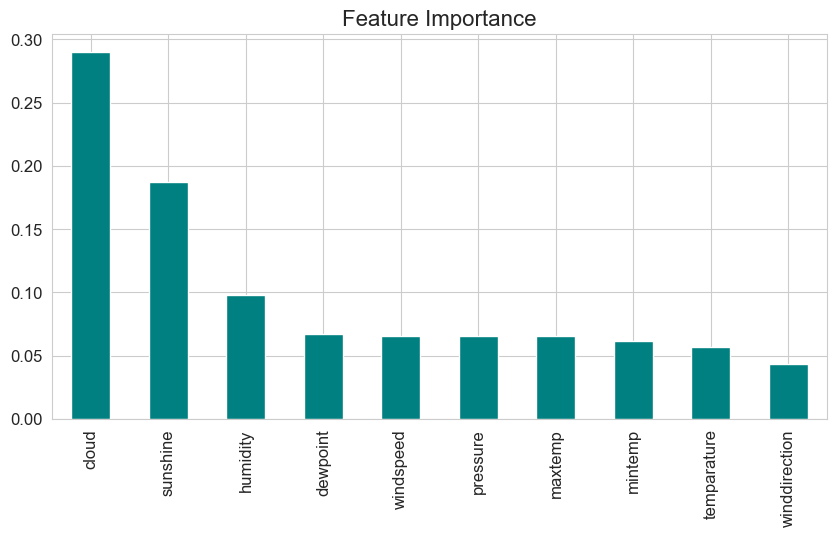

In [55]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest to check feature importance
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(df_train_scaled[numerical_features], df_train_scaled['rainfall'])

# Plot feature importance
importance = model.feature_importances_
feature_importance = pd.Series(importance, index=numerical_features).sort_values(ascending=False)

feature_importance.plot(kind='bar', figsize=(10, 5), color='teal')
plt.title("Feature Importance")
plt.show()


In [56]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df_train_scaled[numerical_features]  # Select only numerical features
y = df_train_scaled['rainfall']          # Target variable (Binary: 0 or 1)

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate Performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.865296803652968
              precision    recall  f1-score   support

           0       0.79      0.62      0.69       108
           1       0.88      0.95      0.91       330

    accuracy                           0.87       438
   macro avg       0.84      0.78      0.80       438
weighted avg       0.86      0.87      0.86       438



In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}  # Different regularization strengths

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'C': 1}
Best Accuracy: 0.8653154253154254


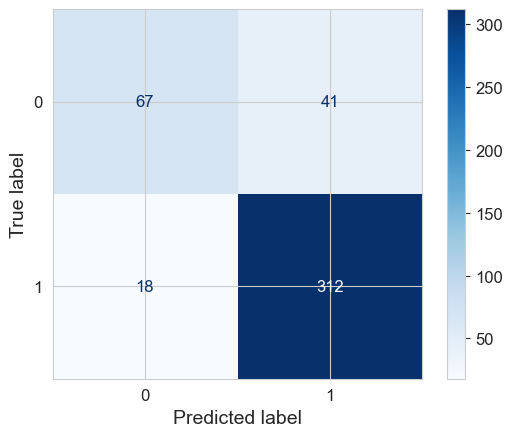

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.show()


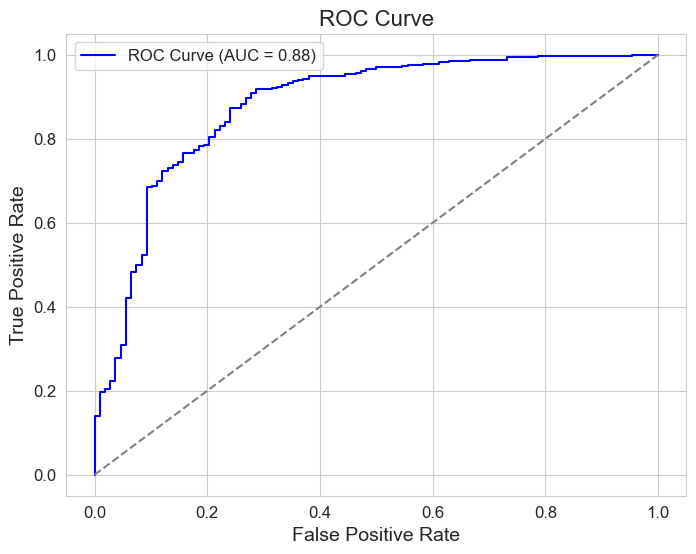

In [60]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]  # Get probability of positive class
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [61]:
# import pickle
# with open("../Binary Prediction with a Rainfall/rainfall_prediction_model.pkl", "wb") as f:
#     pickle.dump(model, f)


In [66]:
df_sample["rainfall"]="sample_submission.csv"

NameError: name 'df_sample' is not defined

In [64]:
import pandas as pd

# Create submission DataFrame
submission = pd.DataFrame({
    'id': df_test['id'],  # Ensure IDs match the test dataset
    'prediction': test_predictions
})

# Save submission file
submission_path = r"../Binary Prediction with a Rainfall/data/New_submission.csv"
submission.to_csv(submission_path, index=False)

print(f"Submission file saved at {submission_path}")


NameError: name 'test_predictions' is not defined

In [38]:
df_train = df_train.drop("id", axis=1)

In [ ]:
# submit the model
# df_sample.to_csv(r"D:/Kaggle/Loan Approval Pred/playground-series-s4e10/New_submission.csv", index=False)
